Clasify handwritten digits into their ten categories(0-9). It has 60,000 training images and 10000 testing images.
The MNIST dataset in pre-loaded in the form of four numpy arrays.

In [3]:
# load MNISt from keras
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# check the shape of train_images
train_images.shape

(60000, 28, 28)

In [5]:
# check the shape of test_images
test_images.shape

(10000, 28, 28)

In [7]:
# create the network/model
from keras import models
from keras import layers
network = models.Sequential()
# input layer
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
#ouput layer
network.add(layers.Dense(10,activation='softmax')) # 10 beacuse ten digits (0-9) , softmax for multiclass classification



In [9]:
# compile the model
# loss function - measures the performance (actual vs predicted)
# optimizer - mechanism by which the network will update itself based on the data it sees
# metrics to monitor - accuracy.
network.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics=['accuracy'])

In [10]:
# prepare the image data
train_images = train_images.reshape((60000,28*28))
test_images = test_images.reshape((10000,28*28))
# scale the values betwen  0 to 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [11]:
# prepare the lables
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
# check the shape of train
train_images.shape

(60000, 784)

In [13]:
# fit the model
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2681 - accuracy: 0.9225
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1082 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0711 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0511 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0385 - accuracy: 0.9888


In [14]:
# evaluate the model
test_loss,test_acc = network.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9794


In [15]:
test_acc

0.9793999791145325

In [23]:
# predict using the model
test_labels[1].argmax()

2

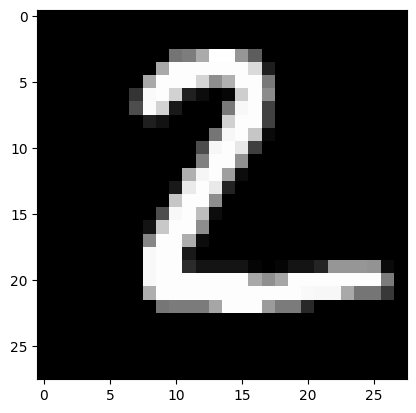

In [24]:
# print first images
import matplotlib.pyplot as plt
img = test_images[1].reshape((28,28))
plt.imshow(img,cmap='gray')
plt.show()


In [20]:
# predict the label using the network/model
prediction = network.predict(test_images[:2])

1/1 [==============================] - 0s 73ms/step


In [21]:
prediction

array([[9.5078775e-08, 2.7078373e-09, 1.3672751e-05, 3.8322818e-05,
        1.3454830e-11, 9.9455200e-09, 2.7674474e-11, 9.9994659e-01,
        1.3530442e-07, 1.2519612e-06],
       [4.3923865e-08, 1.1198467e-06, 9.9999559e-01, 2.3421821e-06,
        1.1663126e-13, 1.5625486e-09, 2.7872449e-09, 2.6491323e-13,
        9.1197131e-07, 1.1947591e-13]], dtype=float32)

In [25]:
prediction[1].argmax()

2